In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Handy utility functions

In [55]:
def project_into_space(X_embedded, labels, class_names=None):
    """Function draws data embedded into 2-dimensional vector space"""
    
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()
    for i in range(len(set(labels))):
        digit_indeces = (labels == i)
        dim1 = X_embedded[digit_indeces, 0]
        dim2 = X_embedded[digit_indeces, 1]
        if class_names != None:
            plot.scatter(dim1, dim2, label = class_names[i])
        else:
            plot.scatter(dim1, dim2, label = i)
    
    plot.set_xticks(())
    plot.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.show()
    
def save_to_txt(data, labels, file_path):
    """Function saves data to file with extension .txt"""
    
    df = pd.DataFrame(data)
    df['labels'] = labels
    np.savetxt(file_path, df, fmt='%d')

# *args are arguments of function named func
def measure_time(func, *args):
    """Function measures program's time execution"""
    
    start_time = time.time()
    prog = func(*args)
    end_time = time.time()
    
    return end_time - start_time

### Constants

In [3]:
TIME_DICT = {
    'umap_time' : None,
    'humap_time' : None,
    'trimap_time': None,
    'pacmap_time' : None,
    'isomap_time' : None,
    # 'ivhd_time' : None, it will be saved on disc using bash command
}

In [4]:
METRIC_DICT = {
    'umap_metric' : None,
    'humap_metric' : None,
    'trimap_time': None,
    'pacmap_metric' : None,
    'isomap_metric' : None,
    'ivhd_metric' : None
}

### Data preparation

In [5]:
df = pd.read_csv("smallnorb.csv", header = None)

In [6]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,9216
0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,...,173.0,172.0,172.0,172.0,173.0,173.0,173.0,172.0,172.0,0
1,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,...,173.0,172.0,172.0,172.0,173.0,173.0,173.0,172.0,172.0,0
2,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0,...,181.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0,1
3,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,...,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,2
4,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,...,226.0,227.0,227.0,227.0,227.0,227.0,227.0,228.0,228.0,3


In [7]:
SAMPLE_SIZE_SMALL = 30000
SAMPLE_SIZE_TINY = 10000

full = np.array(df, dtype='float32')

X_full = full[:, :-1]
y_full = full[:,-1].astype('int')

X_small = X_full[:SAMPLE_SIZE_SMALL]
y_small = y_full[:SAMPLE_SIZE_SMALL]

X_tiny = X_full[:SAMPLE_SIZE_TINY]
y_tiny = y_full[:SAMPLE_SIZE_TINY]

# df_full = pd.DataFrame(X_tiny)
# df_full.to_csv('./smallnorb_tiny_no_labels.csv', header = False, index = False)

# df_labels = pd.DataFrame(y_tiny)
# df_labels.to_csv('./smallnorb_tiny_labels.csv', header = False, index = False)

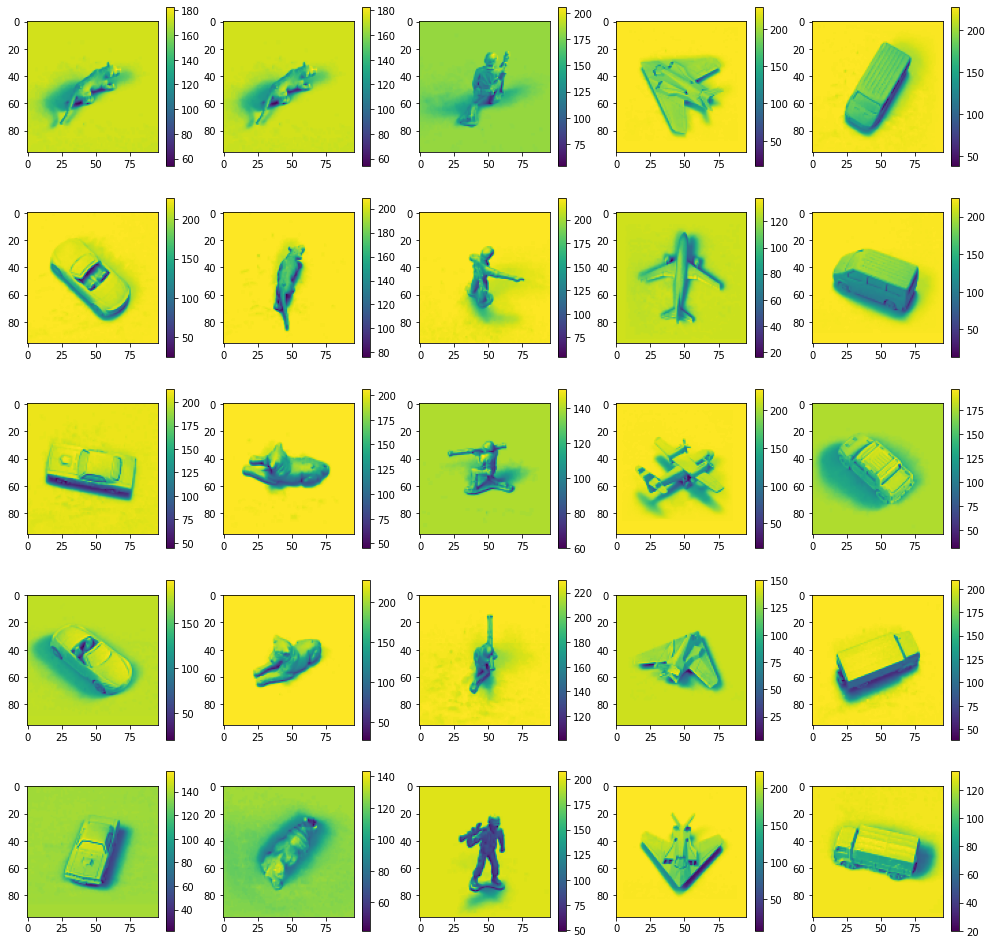

In [8]:
plt.figure(figsize=(17, 17))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(X_full[i].reshape((96,96)))
    plt.colorbar()
plt.show()

### UMAP

In [9]:
import umap.umap_ as umap

In [10]:
umap_smallnorb = umap.UMAP(random_state=42)

umap_start_time = time.time()
X_umap_smallnorb_embedded = umap_smallnorb.fit_transform(X_full)
umap_end_time = time.time()

TIME_DICT['umap_time'] = umap_end_time - umap_start_time

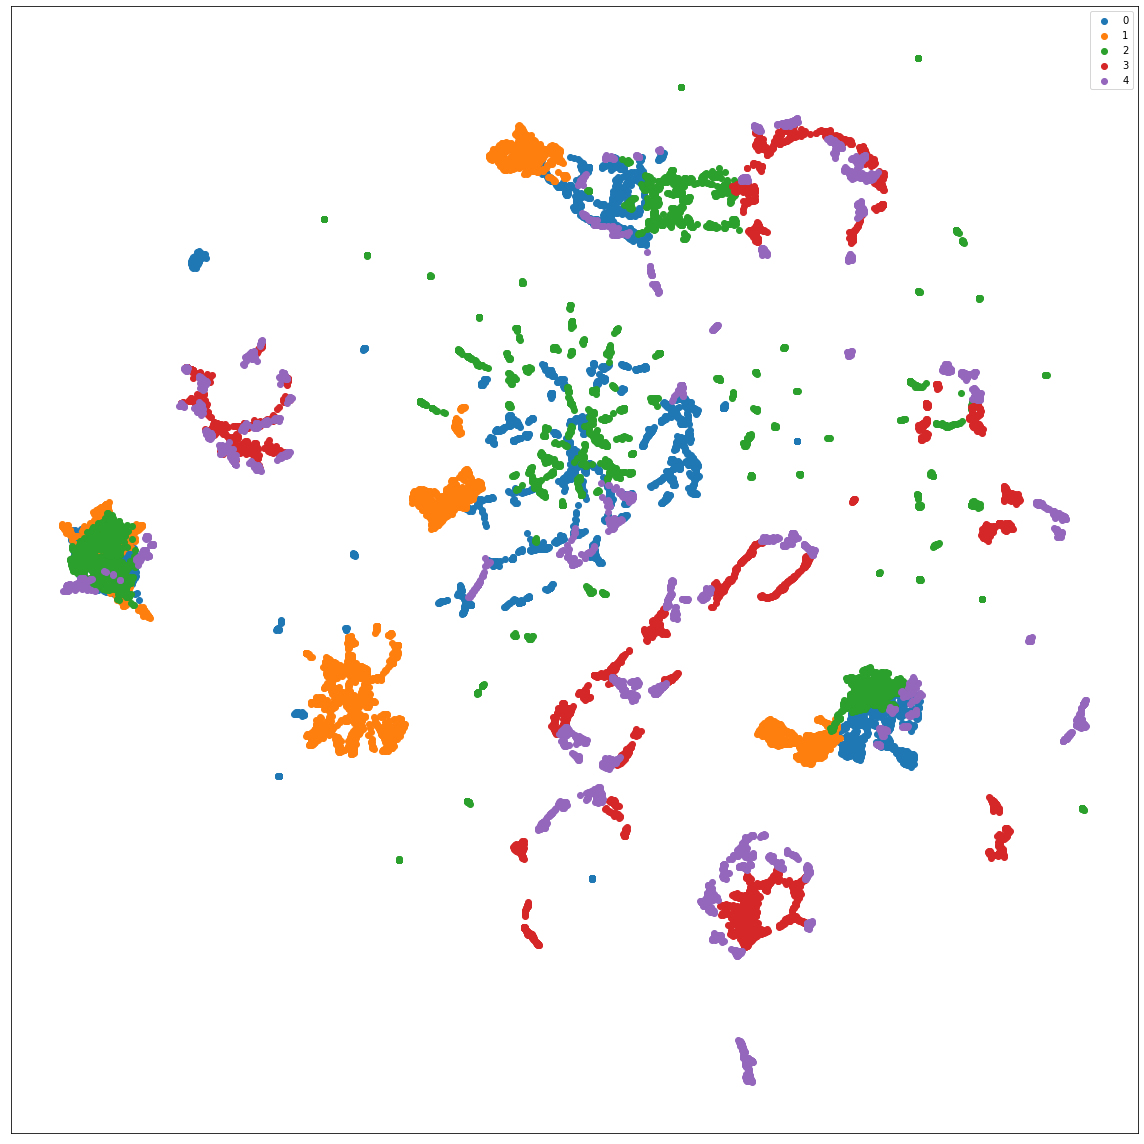

In [56]:
project_into_space(X_umap_smallnorb_embedded, y_full)

In [12]:
save_to_txt(X_umap_smallnorb_embedded, y_full, './smallnorb_embeddings_txt/smallnorb_full_umap_embedding.txt')

In [19]:
TIME_DICT['umap_time']

145.98067688941956

### HUMAP

In [13]:
import humap

In [14]:
hUmap = humap.HUMAP()

humap_start_time = time.time()

hUmap.fit(X_tiny, y_tiny)
humap_embedding_l1 = hUmap.transform(1)

humap_end_time = time.time()

TIME_DICT['humap_time'] = humap_end_time - humap_start_time
y_l1 = hUmap.labels(1)



*************************************************************************
*********************************LEVEL 0*********************************
*************************************************************************

Level 0 with 10000 data samples.
Fitting the first hierarchy level... 
done in 156.799981 seconds.


*************************************************************************
*********************************LEVEL 1*********************************
*************************************************************************

Level 1: 2000 data samples.Computing random walks for sampling selection... 
done in 0.033053 seconds.
Computing random walks for constucting representation neighborhood... 
done in 0.083105 seconds.
Computing similarity among landmarks... 
done in 0.397413 seconds.
Fitting the hierarchy level... 
done in 0.125766 seconds.
Associating data points to landmarks... 
done in 0.003719 seconds.
Storing information for the next hierarchy level... 
done i

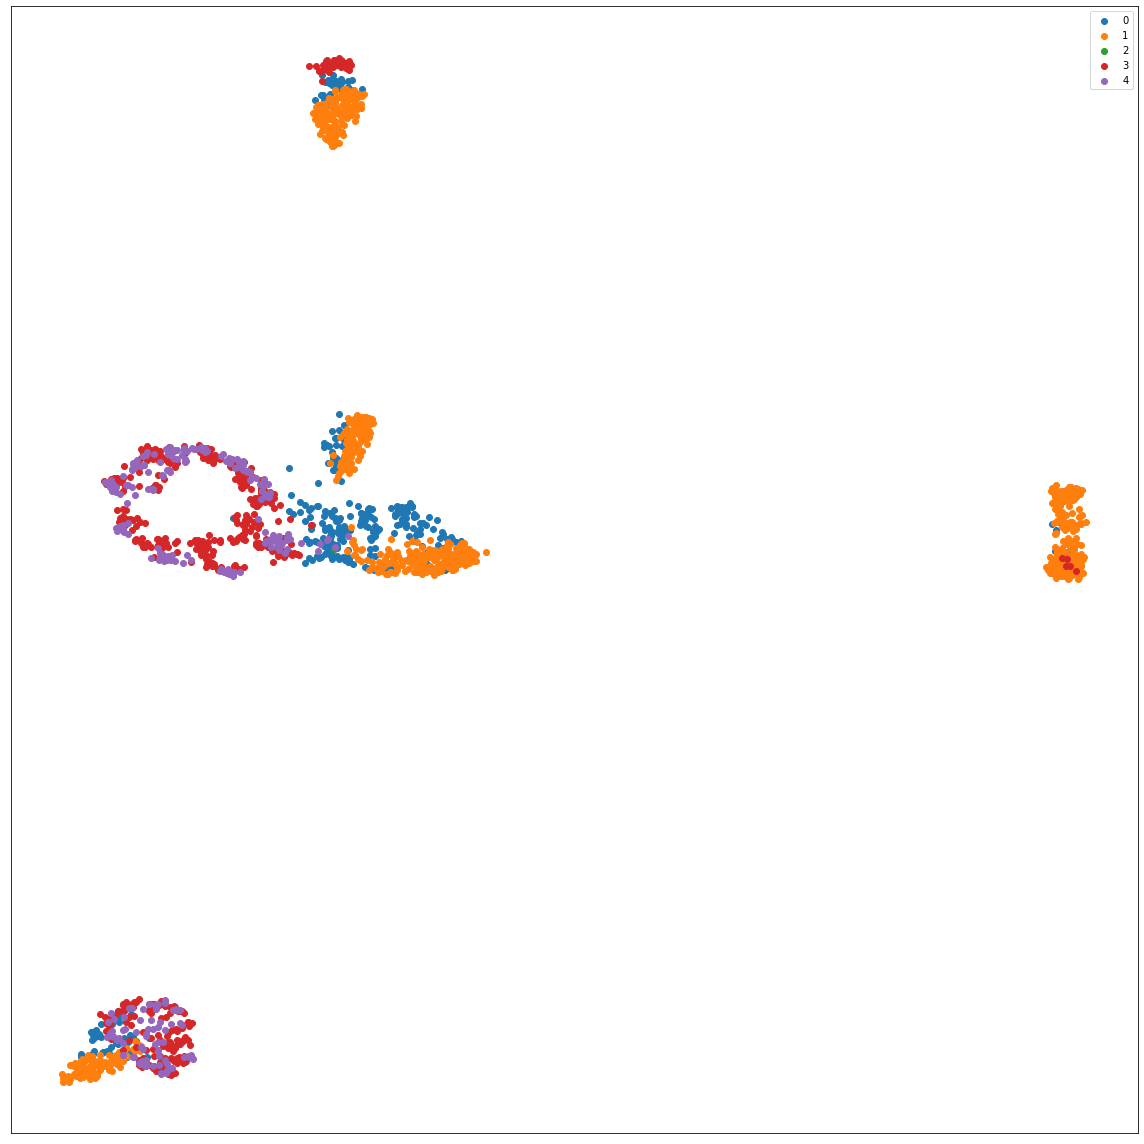

In [57]:
project_into_space(humap_embedding_l1, y_l1)

In [16]:
save_to_txt(humap_embedding_l1, y_l1, './smallnorb_embeddings_txt/smallnorb_tiny_humap_embedding.txt')

In [18]:
TIME_DICT['humap_time']

523.7047369480133

### triMAP

In [20]:
import trimap as trmp

In [21]:
# List to store evaluation time for different metrics
TIME_DICT['trimap_time'] = []

In [22]:
trimap_start_time = time.time()
trimap_embedding_euclidean = trmp.TRIMAP(distance = 'euclidean').fit_transform(X_full)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

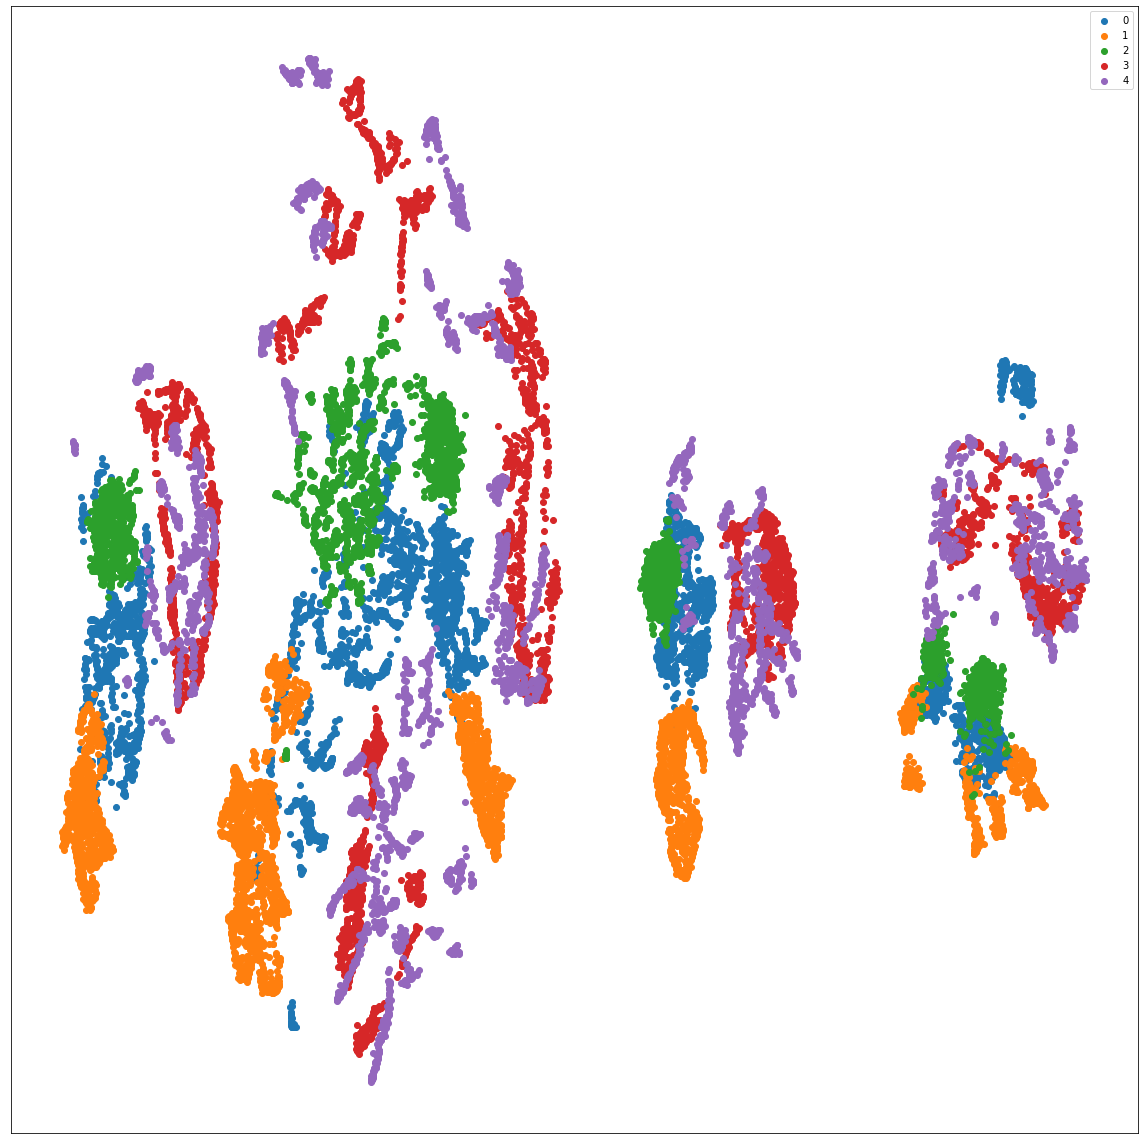

In [58]:
project_into_space(trimap_embedding_euclidean, y_full)

In [25]:
save_to_txt(trimap_embedding_euclidean, y_full, 
            './smallnorb_embeddings_txt/smallnorb_full_trimap_euclidean_embedding.txt')

In [26]:
trimap_start_time = time.time()
trimap_embedding_manhattan = trmp.TRIMAP(distance = 'manhattan').fit_transform(X_full)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

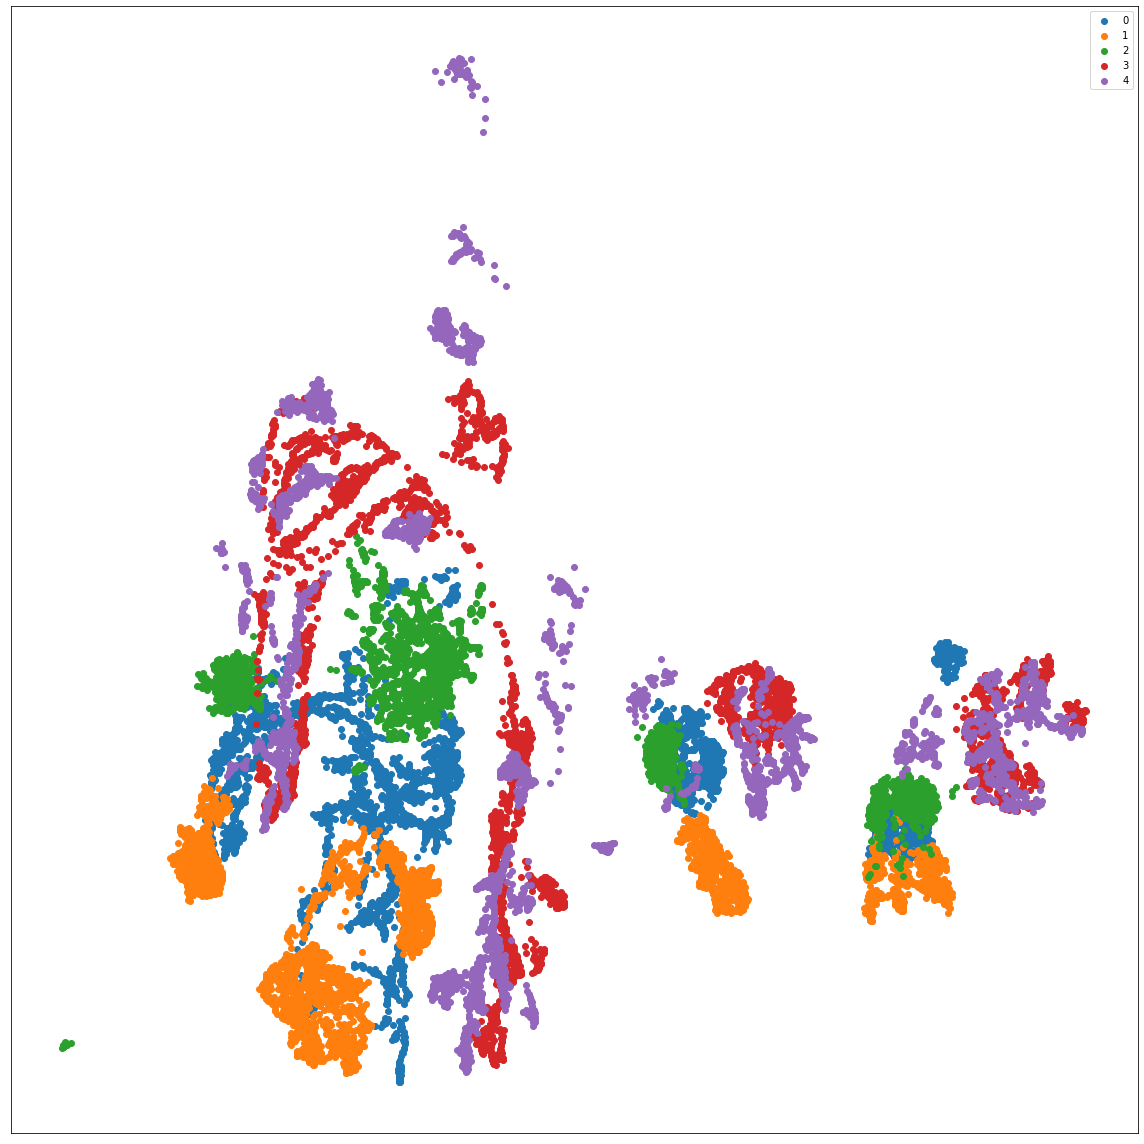

In [27]:
project_into_space(trimap_embedding_manhattan, y_full)

In [28]:
save_to_txt(trimap_embedding_manhattan, y_full, 
            './smallnorb_embeddings_txt/smallnorb_full_trimap_manhattan_embedding.txt')

In [29]:
trimap_start_time = time.time()
trimap_embedding_cosine = trmp.TRIMAP(distance = 'cosine').fit_transform(X_full)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

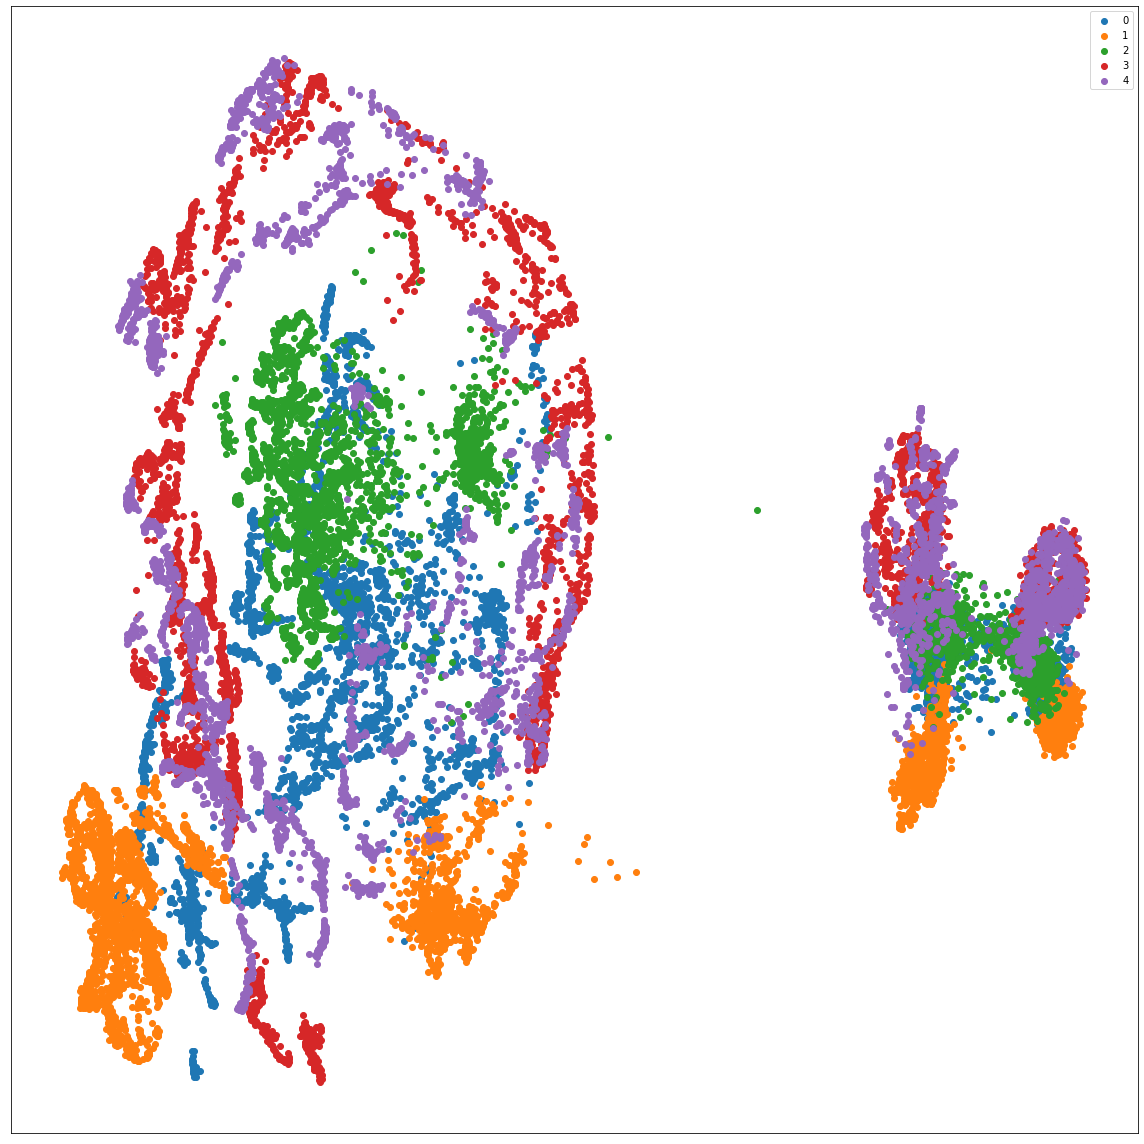

In [30]:
project_into_space(trimap_embedding_cosine, y_full)

In [31]:
save_to_txt(trimap_embedding_cosine, y_full, 
            './smallnorb_embeddings_txt/smallnorb_full_trimap_cosine_embedding.txt')

In [33]:
TIME_DICT['trimap_time']

[88.3638117313385, 52.13031578063965, 55.84617900848389]

### PacMAP

In [34]:
import pacmap as pcmp

In [35]:
pacmap_start_time = time.time()
pacmap_embedding = pcmp.PaCMAP().fit_transform(X_full)
pacmap_end_time = time.time()

TIME_DICT['pacmap_time'] = pacmap_end_time - pacmap_start_time

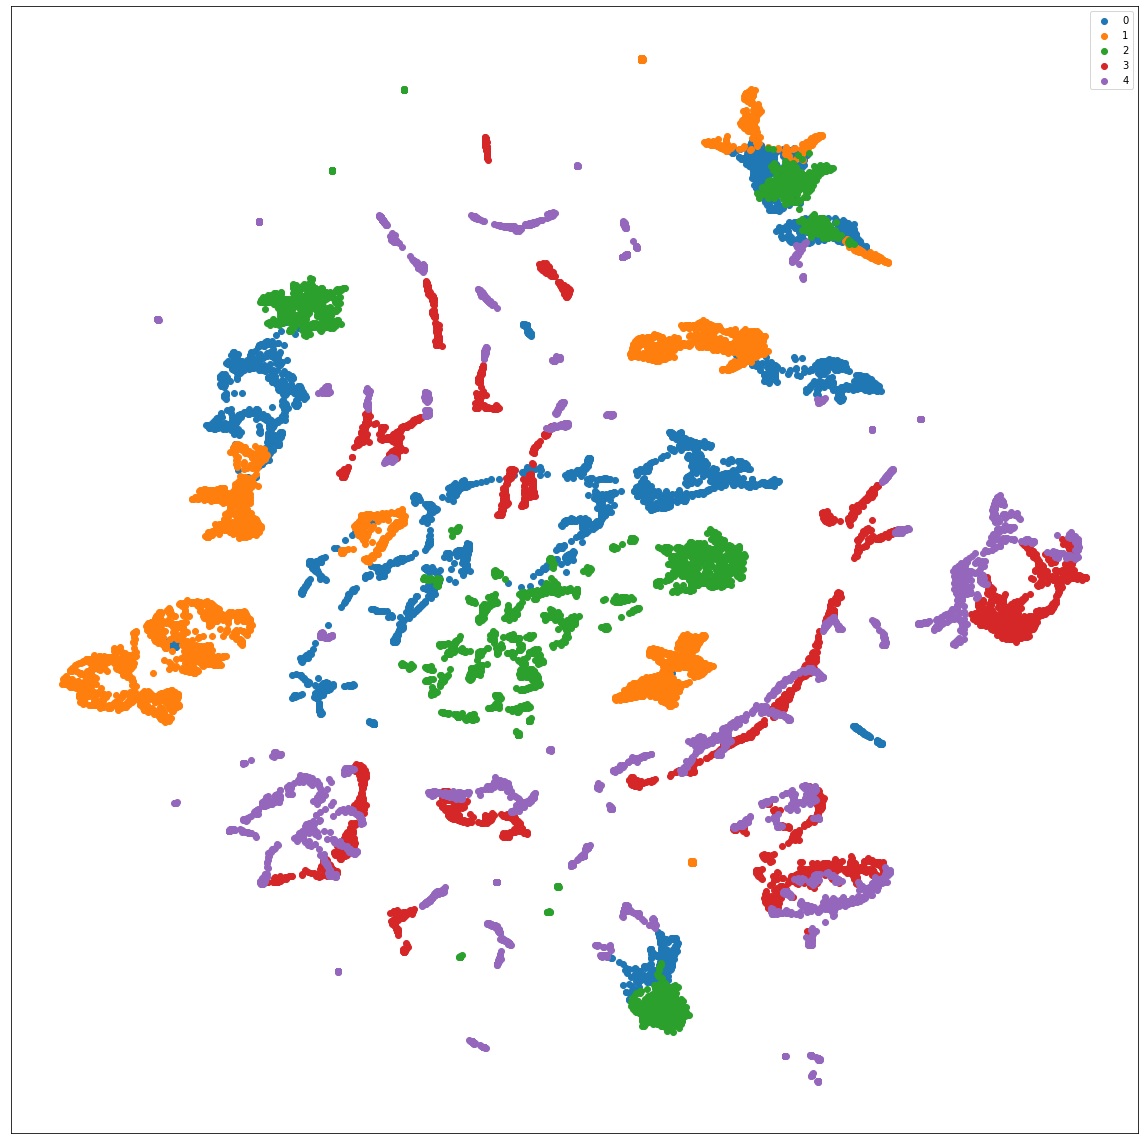

In [36]:
project_into_space(pacmap_embedding, y_full)

In [37]:
save_to_txt(pacmap_embedding, y_full, 
            './smallnorb_embeddings_txt/smallnorb_full_pacmap_embedding.txt')

In [38]:
TIME_DICT['pacmap_time']

42.11976385116577

### Isomap

In [39]:
from sklearn.manifold import Isomap

In [40]:
# List to store evaluation time for different metrics
TIME_DICT['isomap_time'] = []

In [41]:
isomap_start_time = time.time()
isomap_embedding_minkowski = Isomap(n_components = 2, p = 1).fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficie

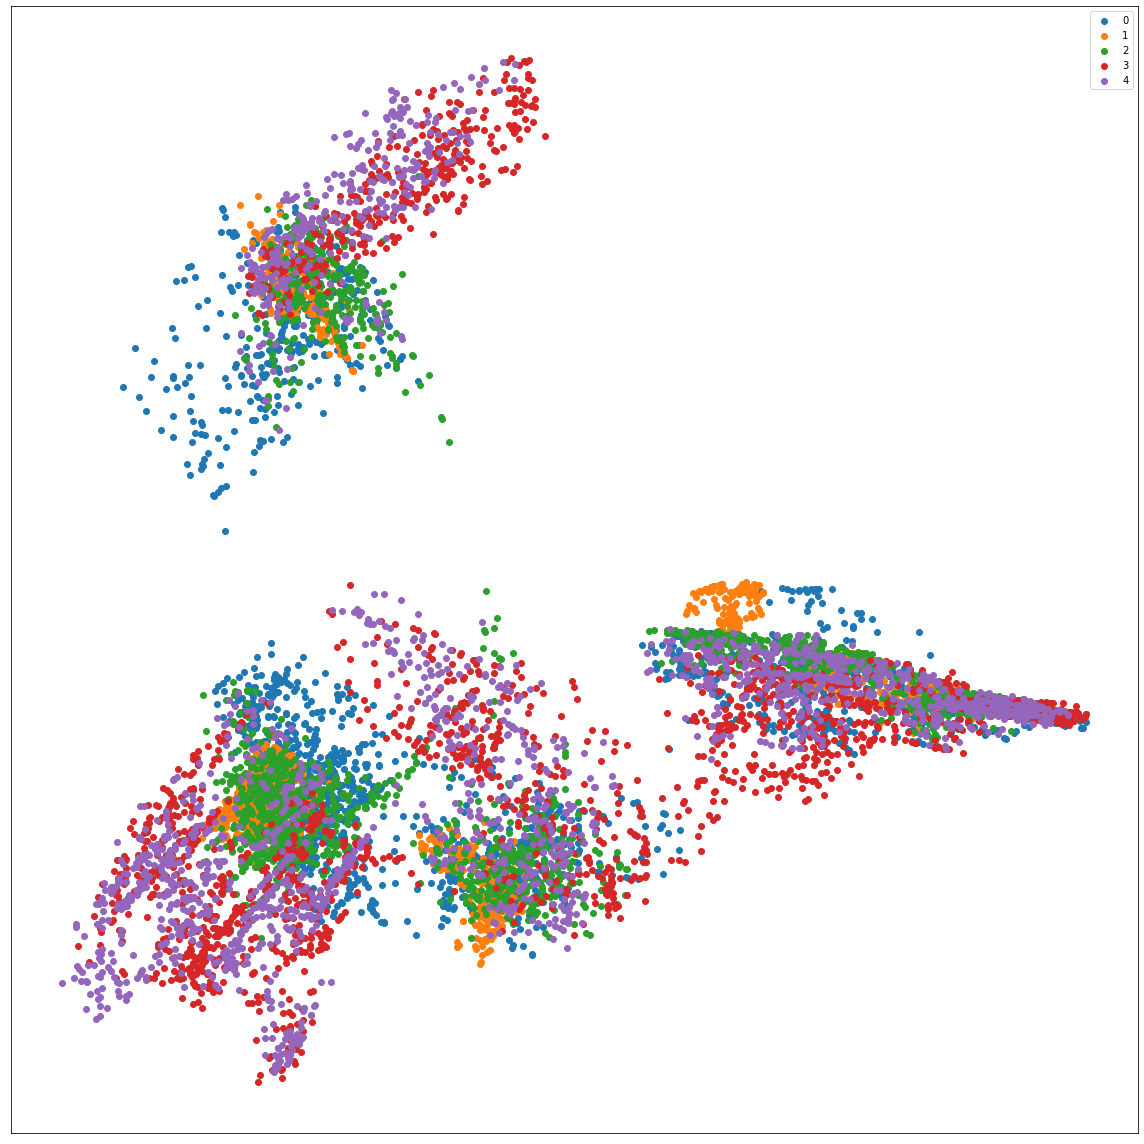

In [42]:
project_into_space(isomap_embedding_minkowski, y_tiny)

In [43]:
save_to_txt(isomap_embedding_minkowski, y_tiny, 
            './smallnorb_embeddings_txt/smallnorb_tiny_isomap_minkowski_embedding.txt')

In [44]:
isomap_start_time = time.time()
isomap_embedding_euclidean = Isomap(n_components = 2, p = 2).fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficie

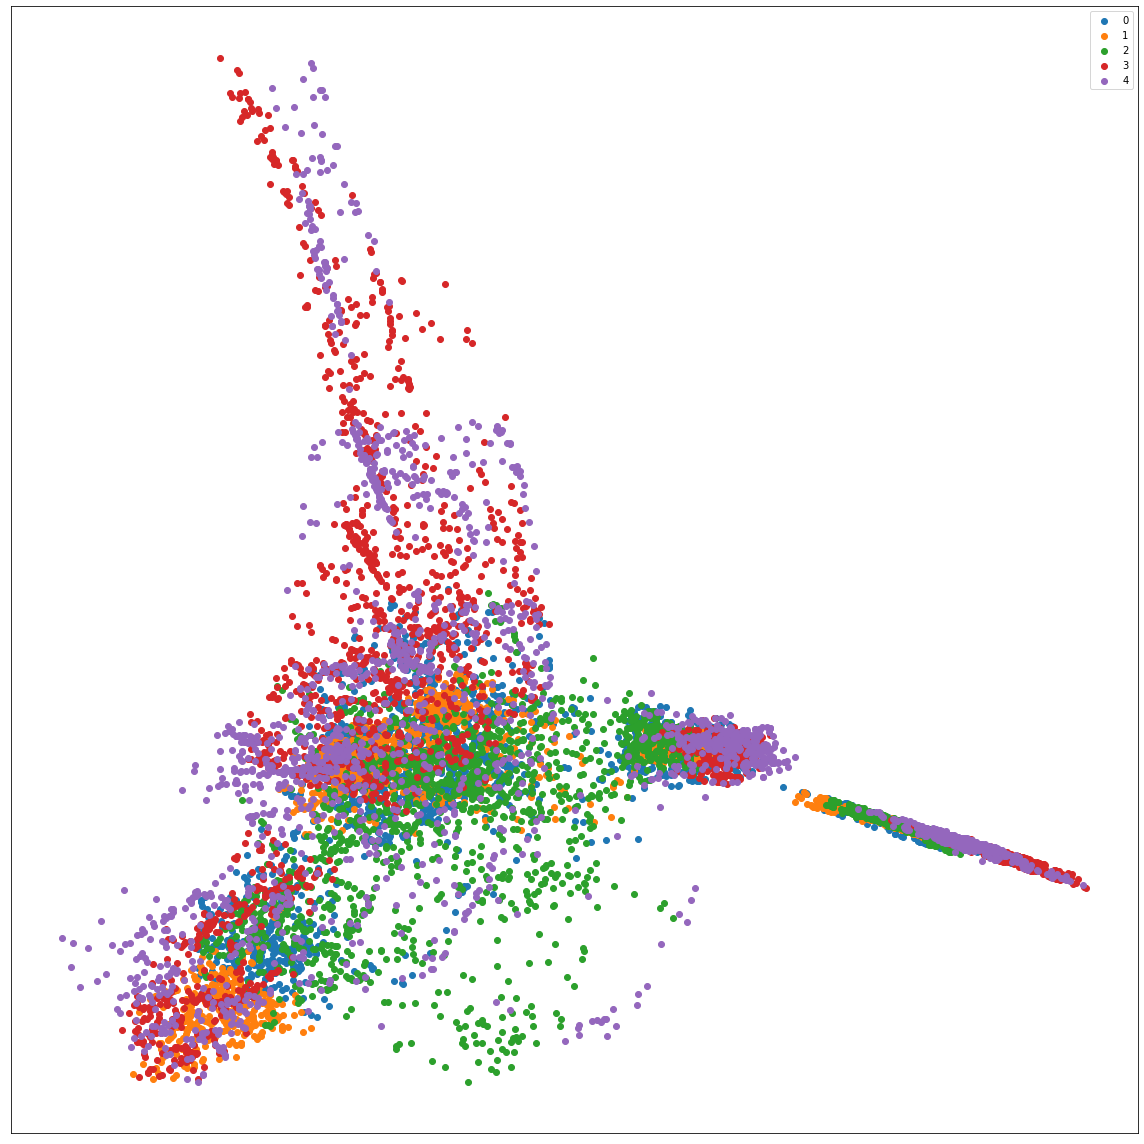

In [45]:
project_into_space(isomap_embedding_euclidean, y_tiny)

In [46]:
save_to_txt(isomap_embedding_euclidean, y_tiny, 
            './smallnorb_embeddings_txt/smallnorb_tiny_isomap_euclidean_embedding.txt')

In [47]:
isomap_start_time = time.time()
isomap_embedding_cosine = Isomap(n_components = 2, metric = 'cosine').fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


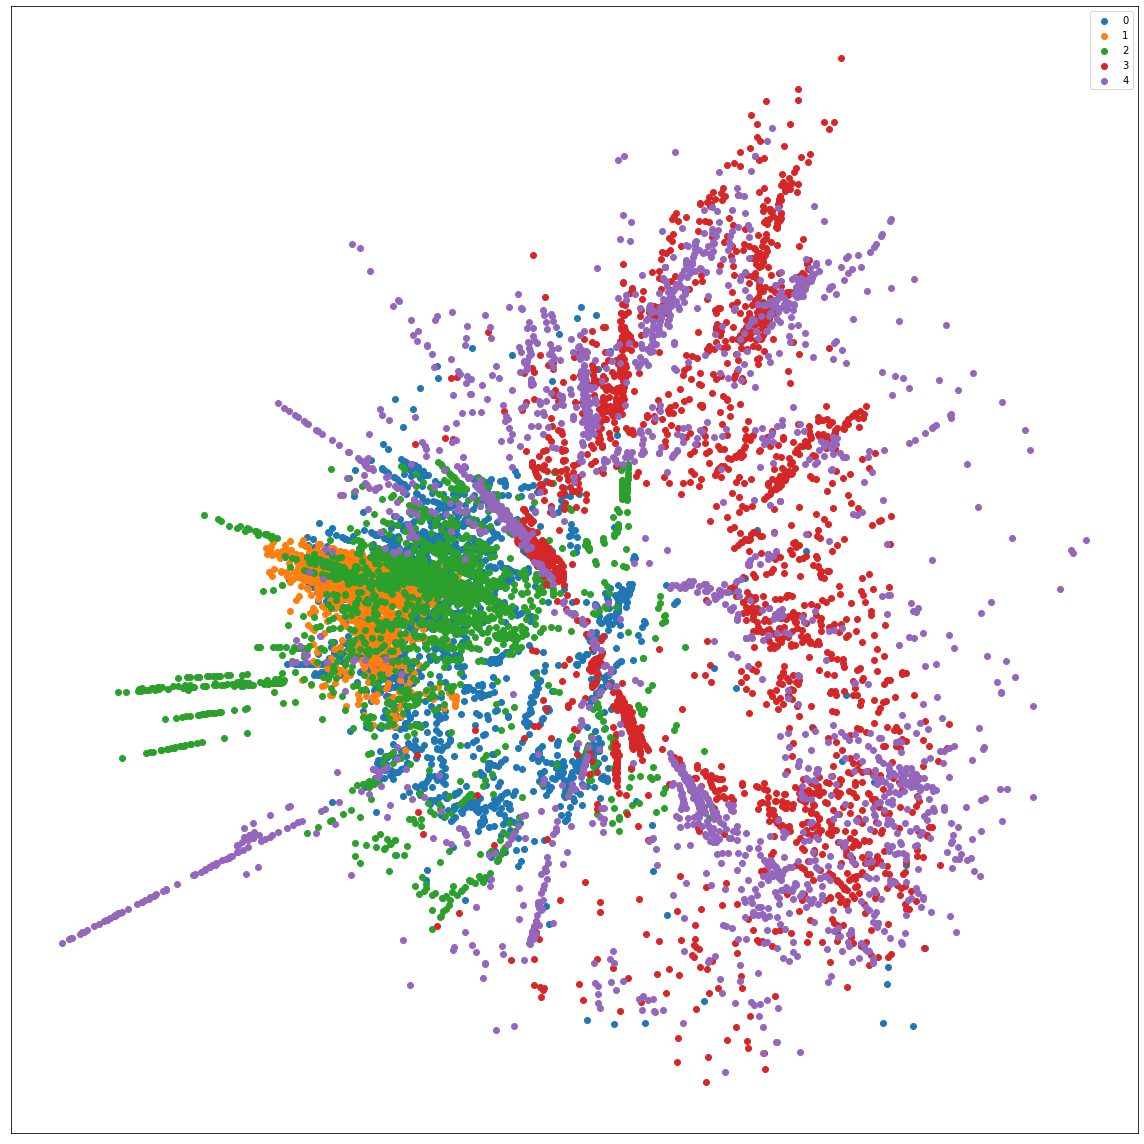

In [48]:
project_into_space(isomap_embedding_cosine, y_tiny)

In [49]:
save_to_txt(isomap_embedding_cosine, y_tiny, 
            './smallnorb_embeddings_txt/smallnorb_tiny_isomap_cosine_embedding.txt')

In [50]:
TIME_DICT['isomap_time']

[958.3455512523651, 194.22284150123596, 118.5497579574585]

## IVHD

### Euclidean metric

In [72]:
# 3N, 3500 iterations
ivhd_euclidean_3N_3500_iter  = pd.read_csv(
    './smallnorb_embeddings_txt/smallnorb_full_ivhd_euclidean_3N_3500_iter_embedding.txt',
                                           header = None)

In [73]:
ivhd_euclidean_3N_3500_iter = ivhd_euclidean_3N_3500_iter.iloc[:, :3]

In [74]:
ivhd_euclidean_3N_3500_iter.columns = ['x', 'y', 'label']
ivhd_euclidean_3N_3500_iter.head(10)

array([[ 0.570779 , -0.0432732,  9.       ],
       [ 0.570005 , -0.0426086,  9.       ],
       [-0.0771322,  0.436197 ,  0.       ],
       ...,
       [ 0.108636 ,  0.657641 ,  1.       ],
       [-0.128776 , -0.507614 ,  8.       ],
       [ 0.108659 ,  0.691262 ,  1.       ]])

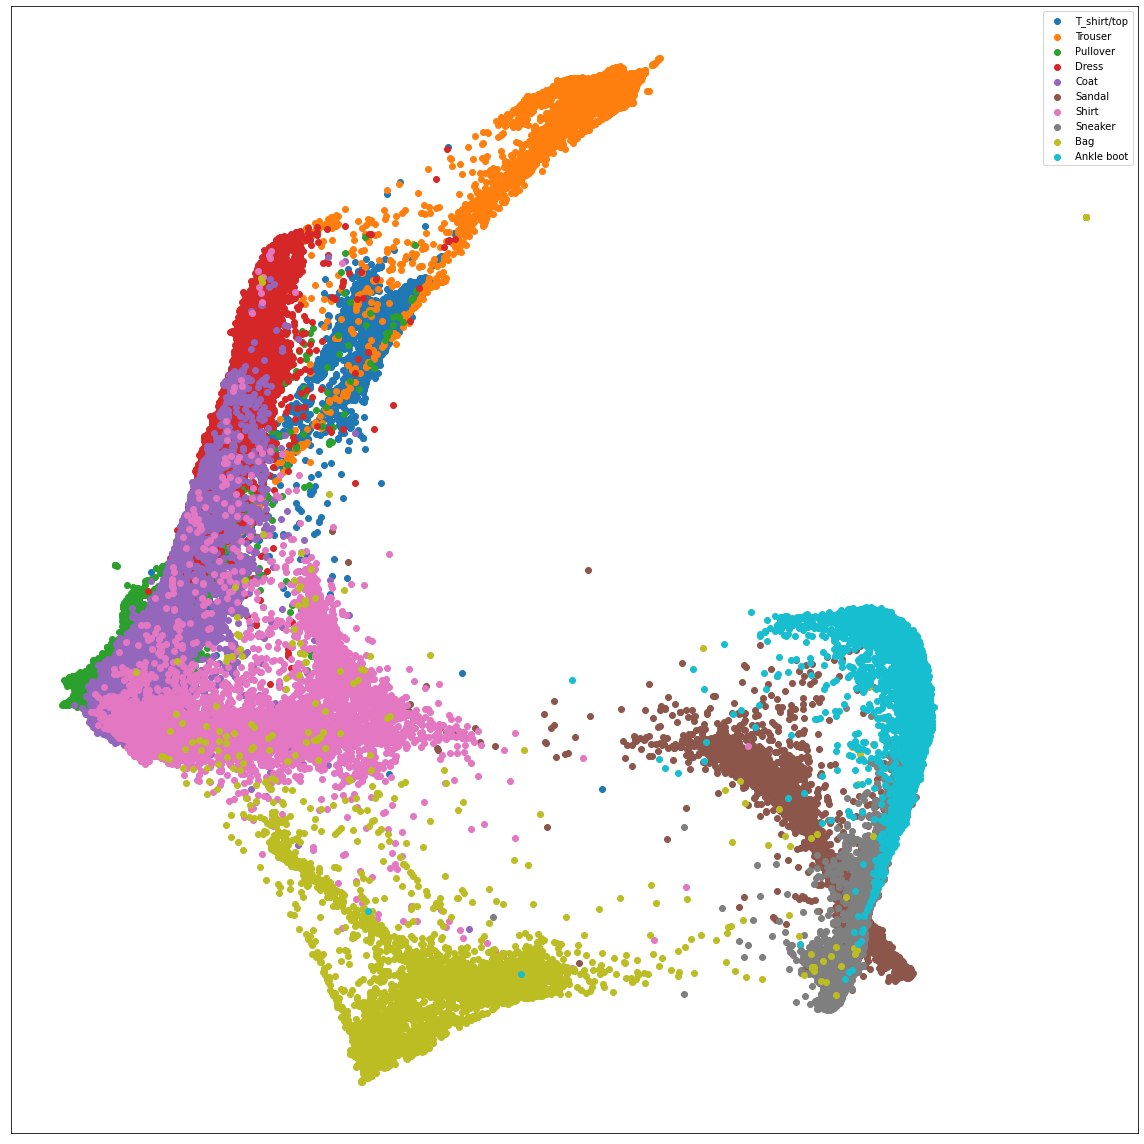

In [75]:
project_into_space(ivhd_euclidean_3N_3500_iter.values[:,:2], ivhd_euclidean_3N_3500_iter.values[:, -1])

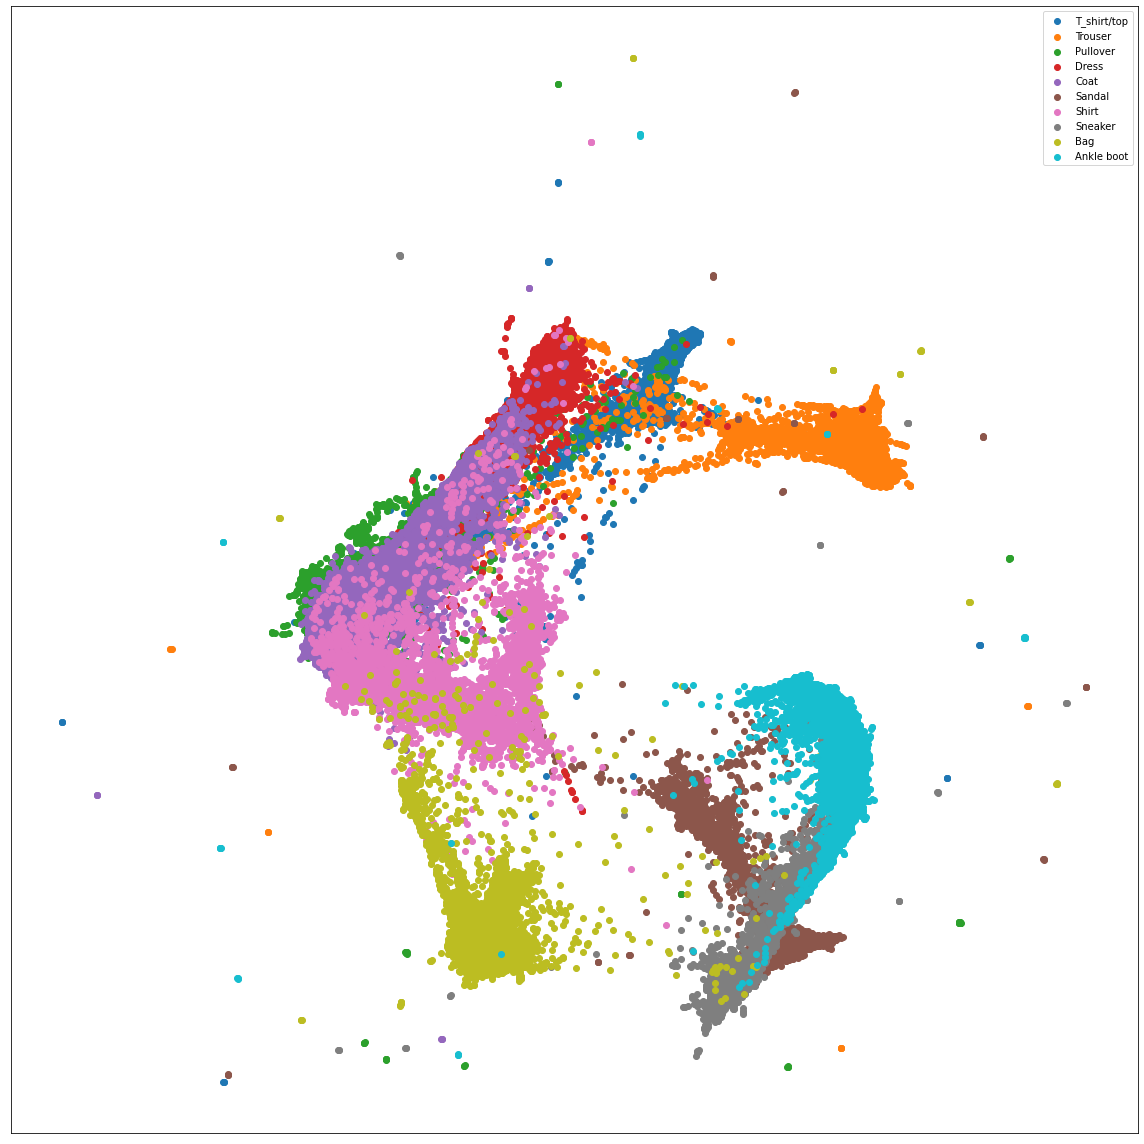

In [81]:
# 2N, 3500 iterations
ivhd_euclidean_2N_3500_iter  = pd.read_csv(
    './smallnorb_embeddings_txt/smallnorb_full_ivhd_euclidean_2N_3500_iter_embedding.txt',
                                           header = None)
ivhd_euclidean_2N_3500_iter = ivhd_euclidean_2N_3500_iter.iloc[:, :3]
ivhd_euclidean_2N_3500_iter.columns = ['x', 'y', 'label']
project_into_space(ivhd_euclidean_2N_3500_iter.values[:,:2], ivhd_euclidean_2N_3500_iter.values[:, -1])

### Cosine metric

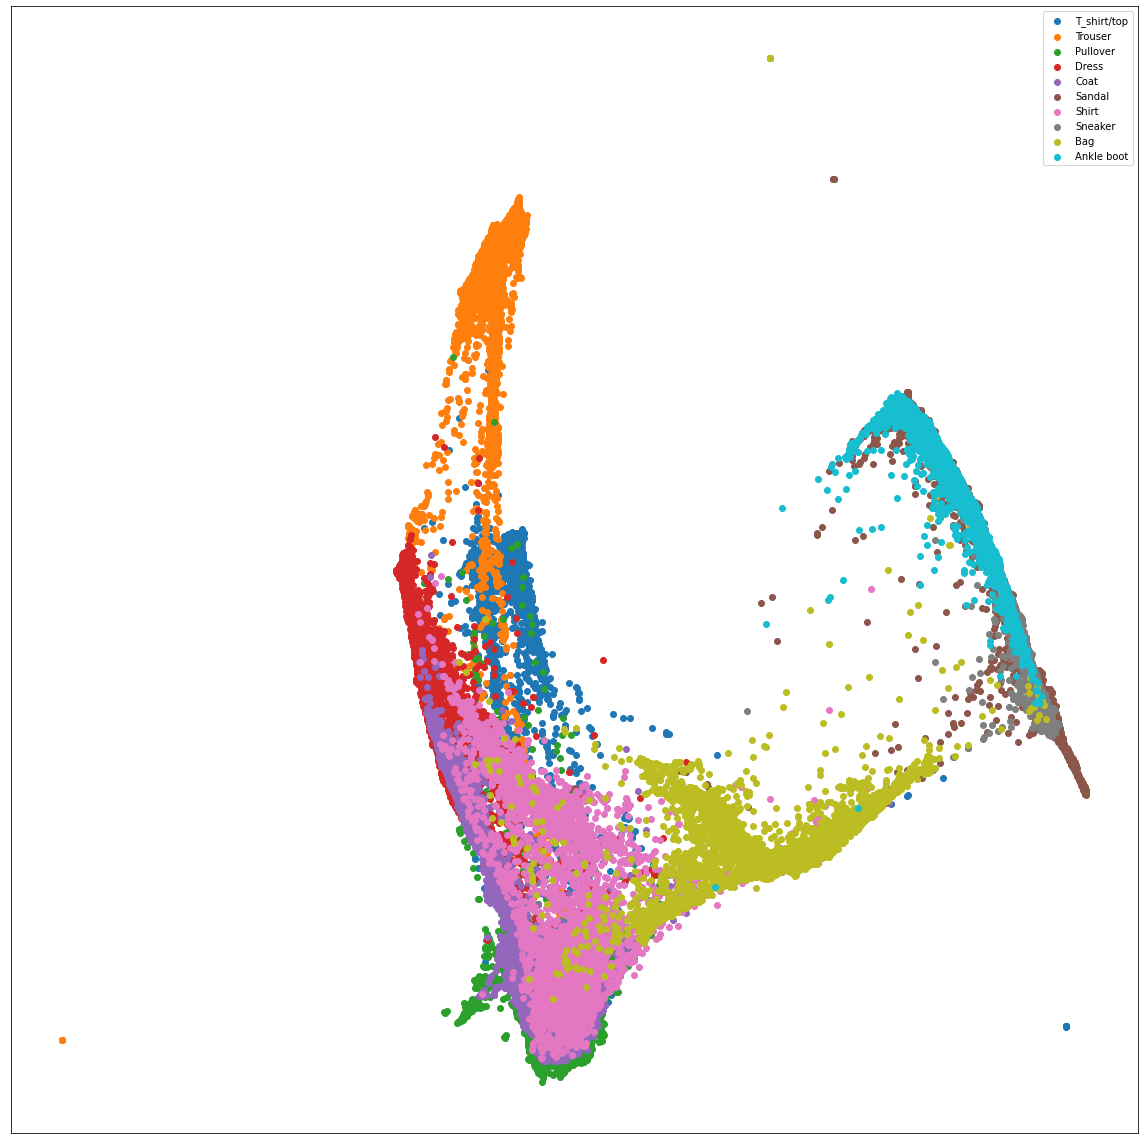

In [87]:
# 3N, 3500 iterations
ivhd_cosine_3N_3500_iter  = ivhd_cosine_3N_3500_iter  = pd.read_csv(
    './smallnorb_embeddings_txt/smallnorb_full_ivhd_cosine_3N_3500_iter_embedding.txt',
                                           header = None)
ivhd_cosine_3N_3500_iter = ivhd_cosine_3N_3500_iter.iloc[:, :3]
ivhd_cosine_3N_3500_iter.columns = ['x', 'y', 'label']
project_into_space(ivhd_cosine_3N_3500_iter.values[:,:2], ivhd_cosine_3N_3500_iter.values[:, -1])

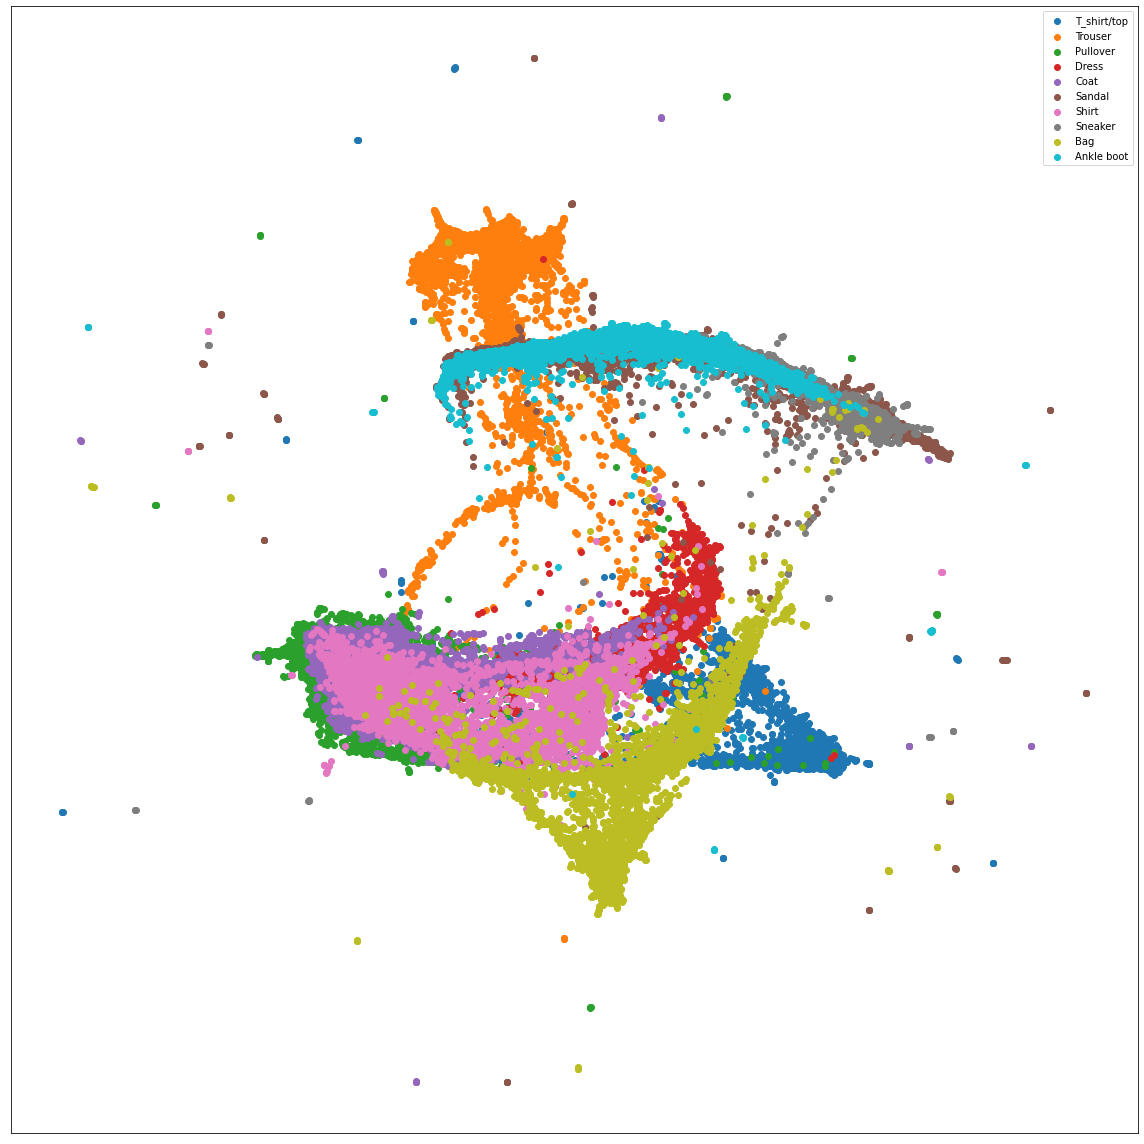

In [88]:
# 2N, 3500 iterations
ivhd_cosine_2N_3500_iter  = pd.read_csv(
    './smallnorb_embeddings_txt/smallnorb_full_ivhd_cosine_2N_3500_iter_embedding.txt',
                                           header = None)
ivhd_cosine_2N_3500_iter = ivhd_cosine_2N_3500_iter.iloc[:, :3]
ivhd_cosine_2N_3500_iter.columns = ['x', 'y', 'label']
project_into_space(ivhd_cosine_2N_3500_iter.values[:,:2], ivhd_cosine_2N_3500_iter.values[:, -1])

## Metrics

### Local score

In [25]:
import local_score

Calculating d_hd
umap
Calculating d_hd
trimap
Calculating d_hd
pacmap
Finished.


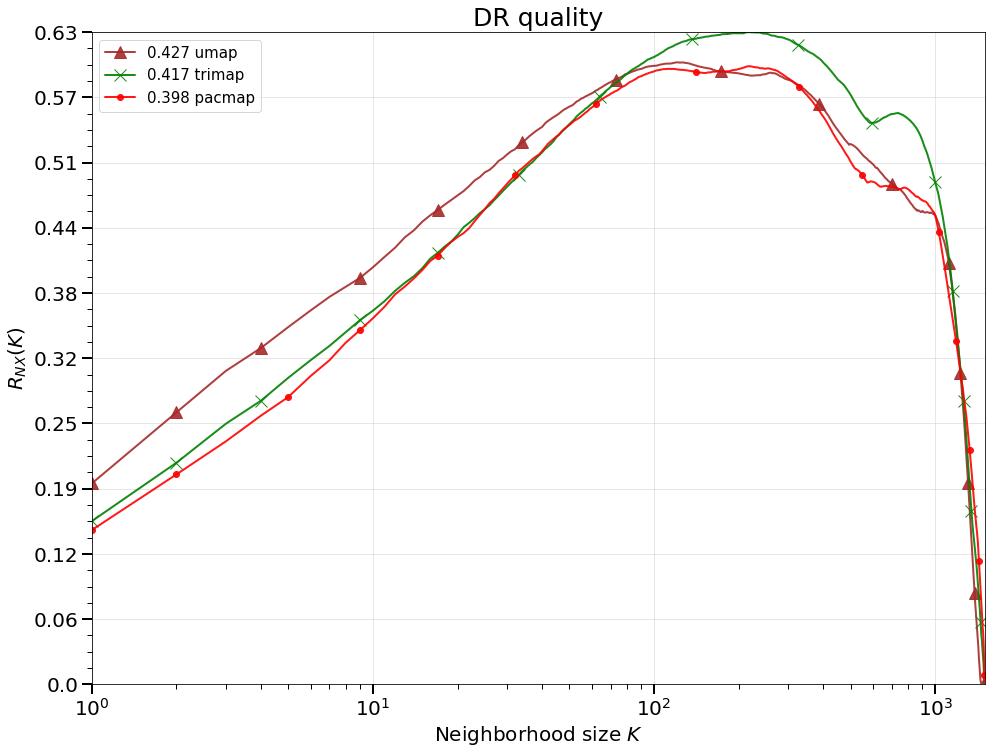

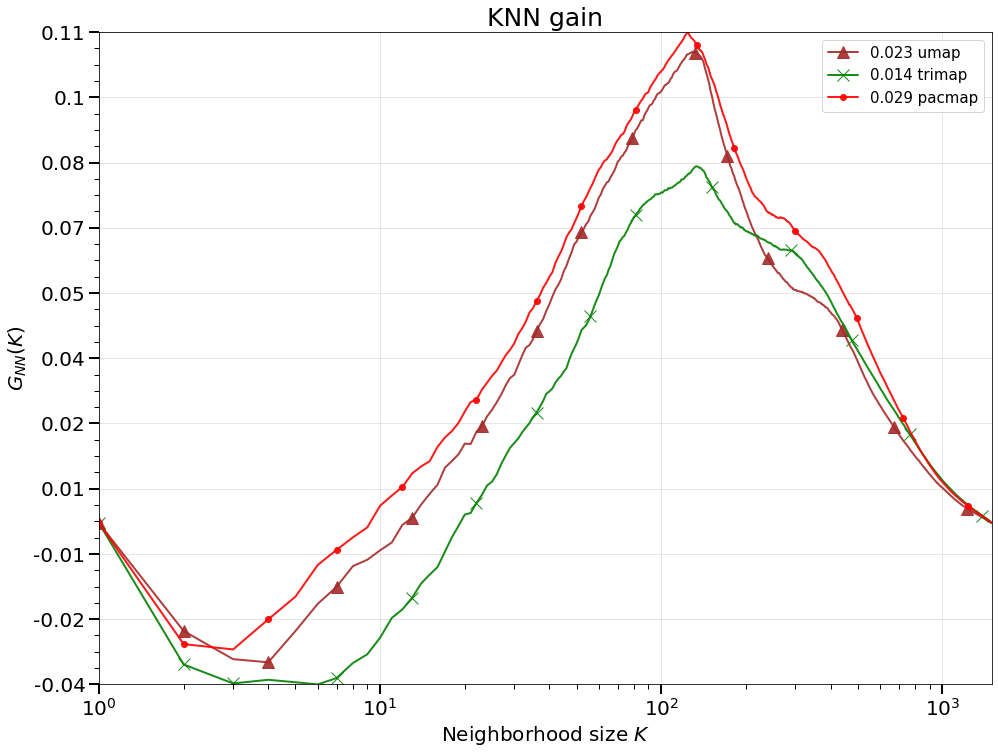

In [27]:
local_metrics = local_score.LocalMetric()

dataset = X_small
labels = y_small

X_embedded = X_umap_fmnist_embedded
method_name = "umap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

# X_embedded = humap_embedding_l2
# method_name = "humap"

# local_metrics.calculate_knn_gain_and_dr_quality(
#     X_lds=X_embedded,
#     X_hds=dataset,
#     labels=np.array(labels),
#     method_name=method_name
# )

X_embedded = trimap_embedding
method_name = "trimap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

X_embedded = pacmap_embedding
method_name = "pacmap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

X_embedded = isomap_embedding
method_name = "isomap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

local_metrics.visualize()

In [28]:
from scipy.spatial import distance_matrix

# X is a design matrix which belongs to space R^{n x 2}, y is a vector of labels
def calculate_metric(X, y):
    """Function returns a value of metric specified in the exercise"""
    
    df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    df['labels'] = y
    dist_same_class = []
    n_elem_same_class = []
    dist_different_class = []
    n_elem_different_class = []
    y_unique = df['labels'].drop_duplicates()
    
    for label in y_unique:
        points_same_class = df[df['labels'] == label]
        points_different_class = df[df['labels'] != label]
        
        dist_mat_same_class = distance_matrix(points_same_class, points_same_class, p=2)
        dist_mat_different_class = distance_matrix(points_same_class, points_different_class, p=2)

        # Sum over upper triangular of dist_mat matrix, we can do that this way because of this method is effective
        dist_same_class.append((dist_mat_same_class.sum() - np.trace(dist_mat_same_class).sum())/2)
        
        reshaped_dist_mat_different_class = np.reshape(dist_mat_different_class,newshape = (1, -1))
        dist_different_class.append(np.sum(reshaped_dist_mat_different_class))
        
        # Elements in upper triangular distance matrix between points from the same class without counting elements from diagonal
        n_elem_same_class.append(((dist_mat_same_class.shape[0])**2 - dist_mat_same_class.shape[0]) / 2)
        n_elem_different_class.append(len(dist_different_class))
        
    numerator = np.sum(dist_same_class) / np.sum(n_elem_same_class)
    denominator = np.sum(dist_different_class) / np.sum(n_elem_different_class)
    
    # We use -log() function to get positive (in most cases) "bigger" number, without log operation we have very small value
    return -round(np.log(numerator / denominator), 3)

Trustworthiness

In [ ]:
umap_embedded_metric = calculate_metric(X_umap_fmnist_embedded, y_small)

trimap_embedded_metric = calculate_metric(trimap_embedding, y_small)

# humap_embedded_metric = calculate_metric(humap_embedding, y_small)

pacmap_embedded_metric = calculate_metric(isomap_embedding, y_small)

# isomap_embedded_metric = calculate_metric(pacmap_embedding, y_small)

In [ ]:
METRIC_DICT['umap_metric'] = umap_embedded_metric
METRIC_DICT['trimap_metric'] = pacmap_embedded_metric
METRIC_DICT['pacmap_metric'] = pacmap_embedded_metric
# METRIC_DICT['isomap_metric'] = isomap_embedded_metric

In [ ]:
print(f"""umap_embedded_metric: {umap_embedded_metric},\n
trimap_embedded_metric: {trimap_embedded_metric},\n
pacmap_embedded_metric: {pacmap_embedded_metric}""")